In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 군집화
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

# 시간 측정을 위한 시간 모듈
import datetime
# 주식 정보를 읽어오기 위한 라이브러리
from pandas_datareader import data

### 데이터 읽어오기

In [2]:
chipo = pd.read_csv("data/chipotle.tsv", sep="\t")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [3]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [4]:
# 결측치 확인
chipo.isna().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [5]:
# 컬럼명 확인
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [6]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 요약 통계 정보

In [7]:
# 숫자 데이터에 대한 요약 통계 정보
# 숫자 데이터 중에 범위형 데이터으 컬럼만 확인한다.
# chipo.describe()
# count : 결측치를 제외한 개수
# mean : 결측치를 제외한 평균
# std : 결측치를 제외한 표준편차
# min : 결측치를 제외한 최소값
# 25% : 결측치를 제외한 25%의 위치 값
# 50% : 결측치를 제외한 50%의 위치 값
# 
chipo[["order_id", "quantity"]].describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [8]:
# 문자열 칼럼 요약통계 정보
# 숫자 칼럼이라도 하더라고 카테고리형 데이터라고 한다면 문자로 변환한다음
# 문자열 컬럼 요약통계 정보로 확인한다.

chipo[["item_name", "choice_description", "item_price"]].describe()

,item_name,choice_description,item_price
count,4622,3376,4622
unique,50,1043,78
top,Chicken Bowl,[Diet Coke],$8.75
freq,726,134,730


### 카테고리형 데이터의 데이터 종류

In [9]:
chipo["item_name"].value_counts().index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito', 'Canned Soft Drink', 'Steak Bowl', 'Chips',
       'Bottled Water', 'Chicken Soft Tacos', 'Chips and Fresh Tomato Salsa',
       'Chicken Salad Bowl', 'Canned Soda', 'Side of Chips', 'Veggie Burrito',
       'Barbacoa Burrito', 'Veggie Bowl', 'Carnitas Bowl', 'Barbacoa Bowl',
       'Carnitas Burrito', 'Steak Soft Tacos', '6 Pack Soft Drink',
       'Chips and Tomatillo Red Chili Salsa', 'Chicken Crispy Tacos',
       'Chips and Tomatillo Green Chili Salsa', 'Carnitas Soft Tacos',
       'Steak Crispy Tacos', 'Chips and Tomatillo-Green Chili Salsa',
       'Steak Salad Bowl', 'Nantucket Nectar', 'Barbacoa Soft Tacos',
       'Chips and Roasted Chili Corn Salsa', 'Izze',
       'Chips and Tomatillo-Red Chili Salsa',
       'Chips and Roasted Chili-Corn Salsa', 'Veggie Salad Bowl',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Chicken Salad',
       'Carnitas Crispy Tacos', 'Veggie Soft Tac

In [10]:
len(chipo["item_name"].unique())

50

이 식당의 메뉴는 총 50가지가 된다.

### 가장 많이 주문한 item 파악하기

In [11]:
# 상품 이름별 몇 개 씩 저장되어 있는지 값을 가져온다.
a1 = chipo["item_name"].value_counts()
# 처음 것을 가져온다.
print(f"가장 많이 주문한 음식 : {a1.index[0]}")

가장 많이 주문한 음식 : Chicken Bowl


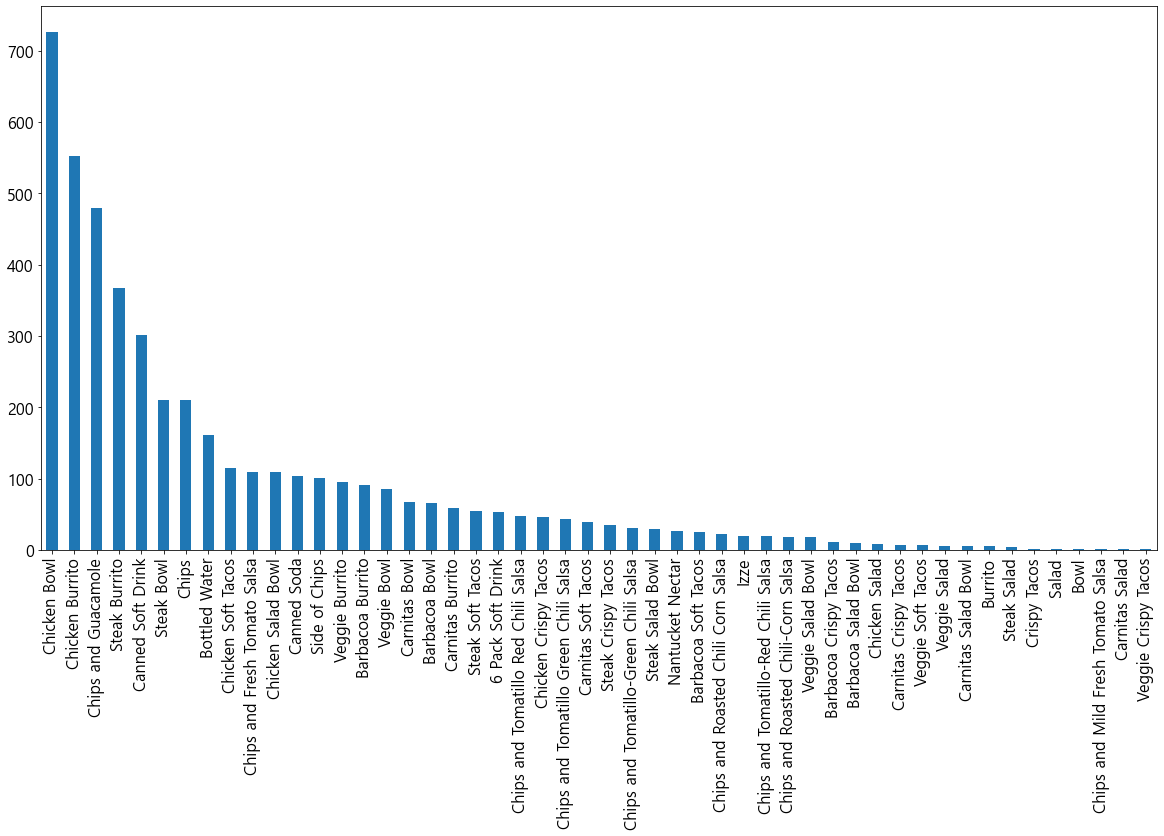

In [12]:
a1 = chipo["item_name"].value_counts()
a1.plot.bar()
plt.show()

### item_name 당 주문 개수 와 총량을 구한다.

In [13]:
# item 당 주문 개수를 가져온다.
order_count = chipo.groupby("item_name")["order_id"].count()
order_count.sort_values(ascending=False)

item_name
Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chicken Salad Bowl                       110
Chips and Fresh Tomato Salsa             110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48


In [14]:
# 아이템당 주문 총량을 구한다.
item_quantity = chipo.groupby("item_name")["quantity"].sum()
item_quantity.sort_values(ascending=False)

item_name
Chicken Bowl                             761
Chicken Burrito                          591
Chips and Guacamole                      506
Steak Burrito                            386
Canned Soft Drink                        351
Chips                                    230
Steak Bowl                               221
Bottled Water                            211
Chips and Fresh Tomato Salsa             130
Canned Soda                              126
Chicken Salad Bowl                       123
Chicken Soft Tacos                       120
Side of Chips                            110
Veggie Burrito                            97
Barbacoa Burrito                          91
Veggie Bowl                               87
Carnitas Bowl                             71
Barbacoa Bowl                             66
Carnitas Burrito                          60
Steak Soft Tacos                          56
6 Pack Soft Drink                         55
Chips and Tomatillo Red Chili Salsa       50


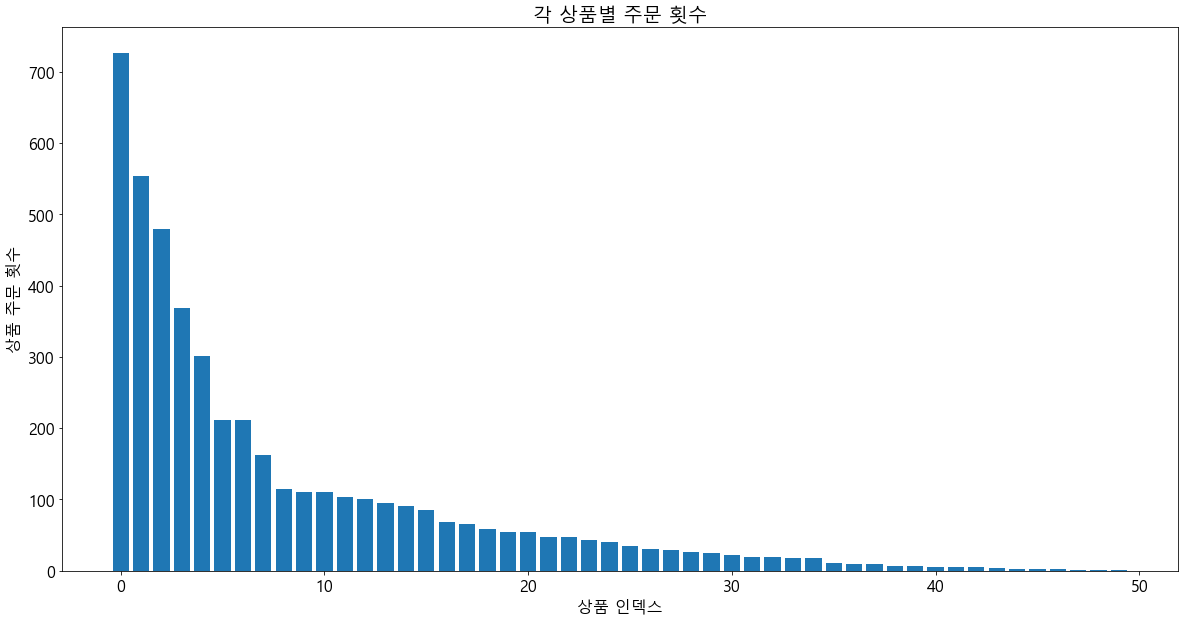

In [15]:
# 각 상품별 주문 횟수
order_count = order_count.sort_values(ascending=False)
item_name_list = order_count.index.tolist()
# x 축 (상품의 개수만큼 값이 들어있는 range)
x = np.arange(len(item_name_list))
# 상품별 주문 횟수
order_count2 = order_count.values.tolist()

# 시각화
plt.bar(x, order_count2, align='center')
plt.ylabel('상품 주문 횟수')
plt.xlabel('상품 인덱스')
plt.title('각 상품별 주문 횟수')
plt.show()


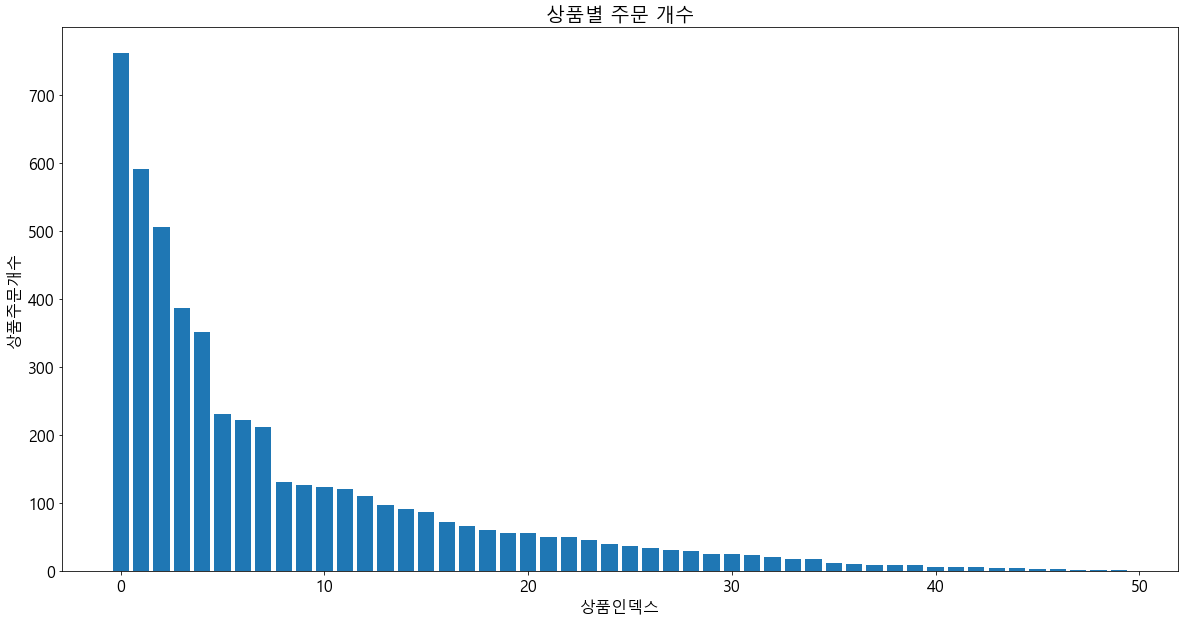

In [16]:
# 주문 상품 총 개수
# 값을 기준으로 내림차순 정렬을 한다.
item_quantity.sort_values(ascending=False, inplace=True)

# 상품 이름 목록
item_name_list = item_quantity.index.tolist()


# 시각화
# X축(상품의 개수만큼 값이 들어있는 range)
x_pos = np.arange(len(item_name_list))

# 상품별 주문 개수
item_cnt = item_quantity.values.tolist()

plt.bar(x_pos, item_cnt, align="center")
plt.ylabel("상품주문개수")
plt.xlabel("상품인덱스")
plt.title("상품별 주문 개수")
plt.show()

In [17]:
df1 = pd.DataFrame({
    '가장 많이 주문한 상품' : order_count.head(10).index,
    "주문횟수" : order_count.head(10).values,
    "주문개수 top10 상품명" : item_quantity.head(10).index,
    "주문개수" : item_quantity.head(10).values
})
df1

,가장 많이 주문한 상품,주문횟수,주문개수 top10 상품명,주문개수
0,Chicken Bowl,726,Chicken Bowl,761
1,Chicken Burrito,553,Chicken Burrito,591
2,Chips and Guacamole,479,Chips and Guacamole,506
3,Steak Burrito,368,Steak Burrito,386
4,Canned Soft Drink,301,Canned Soft Drink,351
5,Steak Bowl,211,Chips,230
6,Chips,211,Steak Bowl,221
7,Bottled Water,162,Bottled Water,211
8,Chicken Soft Tacos,115,Chips and Fresh Tomato Salsa,130
9,Chicken Salad Bowl,110,Canned Soda,126


### apply와 lambda 함수를 이용한 데이터 전처리

In [18]:
chipo["item_price"]

0        $2.39 
1        $3.39 
2        $3.39 
3        $2.39 
4       $16.98 
         ...   
4617    $11.75 
4618    $11.75 
4619    $11.25 
4620     $8.75 
4621     $8.75 
Name: item_price, Length: 4622, dtype: object

In [31]:
# 컬럼 단위 데이터에 apply 함수를 통해 전처리를 한다.
# lambda : 먼저 lambda x에서 x에 데이터가 들어오게 된다.
# 그 후 콜론(:)뒤에 있는 식을 수행하여 그 결과를 반환한다.
# apply : lambda 식을 수행된 결과를 하나씩 쌓아서 Series로 반환한다.
# lambda 식은 주어진 데이터의 수만큼 반복한다.
chipo["item_price"] = chipo["item_price"].apply(lambda x : float(x[1:]))

TypeError: 'float' object is not subscriptable

In [32]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [33]:
chipo["item_price"].describe()

count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price, dtype: float64

### 문제 
- 주문당 평균 계산 금액 출력
- 한 주문에 10달러 이상 사용한 주문의 id를 출력
- 각 아이템의 가격 구하기
- 가장 비싼 주문에서 item이 몇개 팔렸는디
- Veggie Salad Bowl이 몇 번 주문되었는지
- Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기

주문당 평균 계산 금액 출력

In [50]:
price_mean = chipo.groupby("order_id")["item_price"].mean()
price_mean

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

한 주문에 20달러 이상 사용한 주문의 id를 출력

In [122]:
ten_dollar = chipo.groupby("order_id")["item_price"].sum()[chipo.groupby("order_id")["item_price"].sum() >= 20]
ten_dollar

order_id
4       21.00
18      24.90
20      36.20
21      23.36
26      20.50
        ...  
1827    32.95
1829    24.25
1830    23.00
1833    23.50
1834    28.75
Name: item_price, Length: 589, dtype: float64

각 아이템의 가격 구하기

In [88]:
chipo_group = chipo.groupby( "item_name")["item_price"].min()
(chipo_group)

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

가장 비싼 주문에서 item이 몇개 팔렸는디

In [103]:
value = chipo["item_price"].sort_values(ascending=False).values[0]
idx = chipo["item_price"].sort_values(ascending=False).index[0]
quant = chipo["quantity"].loc[idx]
print(f"가장 비싼 주문은 ${value}였으며, 총 {quant}개가 팔렸습니다.")

가장 비싼 주문은 $44.25였으며, 총 15개가 팔렸습니다.


Veggie Salad Bowl이 몇 번 주문되었는지

In [108]:
num = len(chipo.query("item_name == 'Veggie Salad Bowl'"))
print(f"Veggie Salad Bowl은 총 {num}번 주문되었습니다.")

Veggie Salad Bowl은 총 18번 주문되었습니다.


Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기

In [111]:
num = len(chipo.query("item_name == 'Chicken Bowl'").query("quantity >= 2"))
print(f"Chicken Bowl을 2개 이상 주문한 횟수는 {num}번이나 됩니다.")

Chicken Bowl을 2개 이상 주문한 횟수는 33번이나 됩니다.


---

### 주문당 평균 계산

In [112]:
# 데이터 프레임 확인
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


In [113]:
chipo.query('item_name == "Chicken Bowl"')


,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
19,10,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",8.75
26,13,1,Chicken Bowl,"[Roasted Chili Corn Salsa (Medium), [Pinto Bea...",8.49
...,...,...,...,...,...
4590,1825,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",11.25
4591,1825,1,Chicken Bowl,"[Tomatillo Red Chili Salsa, [Rice, Black Beans...",8.75
4595,1826,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Bea...",8.75
4599,1827,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Cheese, Lettuce]]",8.75


In [117]:
# 추가 주문 내역이 없는 것을 가져온다.
a1 = chipo["choice_description"].isna()
a2 = chipo[a1]

# quantity가 두 개 인것을 가져온다.
a3 = a2.query("quantity == 2 and item_name == 'Chips'")
display(a3)

# quantity가 한 개 인것을 가져온다.
a4 = a2.query("quantity == 1 and item_name == 'Chips'")
display(a4)

,order_id,quantity,item_name,choice_description,item_price
223,98,2,Chips,NaN,4.3
828,343,2,Chips,NaN,4.3
1301,530,2,Chips,NaN,4.3
1600,648,2,Chips,NaN,4.3
1605,649,2,Chips,NaN,4.3
1850,750,2,Chips,NaN,4.3
1900,766,2,Chips,NaN,4.3
2112,850,2,Chips,NaN,4.3
2258,909,2,Chips,NaN,4.3
2343,934,2,Chips,NaN,4.3


,order_id,quantity,item_name,choice_description,item_price
40,19,1,Chips,NaN,2.15
59,27,1,Chips,NaN,2.15
77,34,1,Chips,NaN,2.15
80,35,1,Chips,NaN,2.15
208,92,1,Chips,NaN,2.15
...,...,...,...,...,...
4505,1791,1,Chips,NaN,2.15
4509,1793,1,Chips,NaN,1.99
4525,1799,1,Chips,NaN,2.15
4584,1823,1,Chips,NaN,2.15


item_price는 상품에 대한 단가가 아니라 해당 주문에 대한 총 금액임을 알 수 있다.

item_price는 단가에 quantity를 곱한 값이된다. 이에 order_id 를 기준으로 그룹을 묶고 평균을 구하면 된다. 만약 item_price가 단가였다면 item_price와 quantity를 곱한 결과를 가진 컬럼을 추가한다음에 그 컬럼의 평균을 구해야 한다.


다행이네요!

In [119]:
# 주문당 평균을 구한다.
chipo.groupby("order_id")["item_price"].mean()

order_id
1        2.890000
2       16.980000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: item_price, Length: 1834, dtype: float64

In [120]:
# 주문당 총합을 구한다.
chipo.groupby("order_id")["item_price"].sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [121]:
# 주문당 주문건수를 구한다.
chipo.groupby("order_id")["item_price"].count()

order_id
1       4
2       1
3       2
4       2
5       2
       ..
1830    2
1831    3
1832    2
1833    2
1834    3
Name: item_price, Length: 1834, dtype: int64

groupby의 아름다운 능력

### 한 주문에서 20달러 이상 사용한 주문의 id를 가져온다.

In [124]:
# 각 주문별 총 주문 금액을 가져온다.
a1 = chipo.groupby("order_id")["item_price"].sum()
a1

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: item_price, Length: 1834, dtype: float64

In [127]:
# 주문 총 금액이 20달러 이상인 것은 True, 아닌 것은 False인 데이터롤 가져온다.
a2 = a1 >= 20
a2

order_id
1       False
2       False
3       False
4        True
5       False
        ...  
1830     True
1831    False
1832    False
1833     True
1834     True
Name: item_price, Length: 1834, dtype: bool

In [128]:
# 조건에 해당하는 주문의 id를 가져온다.
a3 = a1[a2]
a3.index

Int64Index([   4,   18,   20,   21,   26,   28,   30,   34,   40,   43,
            ...
            1811, 1812, 1822, 1824, 1825, 1827, 1829, 1830, 1833, 1834],
           dtype='int64', name='order_id', length=589)

### 각 상품별 가격 구하기

이거 못 풀었당..

In [130]:
# 상품 종류 개수를 가져온다.
a1 = chipo["item_name"].value_counts()
len(a1)

50

In [132]:
# 한개만 팔린 상품들의 종류를 확인한다.
a1 = chipo.query("quantity == 1")
a2 = a1["item_name"].value_counts()
len(a2)

50

하나만 팔린 목록에 모든 상품이 존재한다.

In [133]:
# 1개만 팔린 상품들의 목록을 가져온다.
chipo_one_item = chipo.query("quantity == 1")
chipo_one_item

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [134]:
# 특정 상품의 가격이 한 가지만 있는지 확인한다.
a1 = chipo_one_item.query("item_name == 'Chips and Fresh Tomato Salsa'")
a2 = a1['item_price']
a2.value_counts()

2.95    66
2.39    36
2.29     3
Name: item_price, dtype: int64

상품의 가격이 변합니다. 변할 수 있다. 어떤 가격으로 우리가 선정할건지는 애매해진다. "결정"을 해야 하는 부분

In [136]:
# 모든 주문 건수에 대한 상품 하나의 가격을 구한다.
chipo["item_price2"]  = chipo["item_price"] / chipo["quantity"] 
chipo

,order_id,quantity,item_name,choice_description,item_price,item_price2
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75


In [137]:
# 하나의 상품에 대해 여러가지 값이 존재하므로 최소값으로 결정하낟.
# 각 상품별 최소값을 구한다.
a1 = chipo.groupby("item_name")["item_price2"].min()
a1

item_name
6 Pack Soft Drink                        6.49
Barbacoa Bowl                            8.69
Barbacoa Burrito                         8.69
Barbacoa Crispy Tacos                    8.99
Barbacoa Salad Bowl                      9.39
Barbacoa Soft Tacos                      8.99
Bottled Water                            1.09
Bowl                                     7.40
Burrito                                  7.40
Canned Soda                              1.09
Canned Soft Drink                        1.25
Carnitas Bowl                            8.99
Carnitas Burrito                         8.69
Carnitas Crispy Tacos                    8.99
Carnitas Salad                           8.99
Carnitas Salad Bowl                      9.39
Carnitas Soft Tacos                      8.99
Chicken Bowl                             8.19
Chicken Burrito                          8.19
Chicken Crispy Tacos                     8.49
Chicken Salad                            8.19
Chicken Salad Bowl      

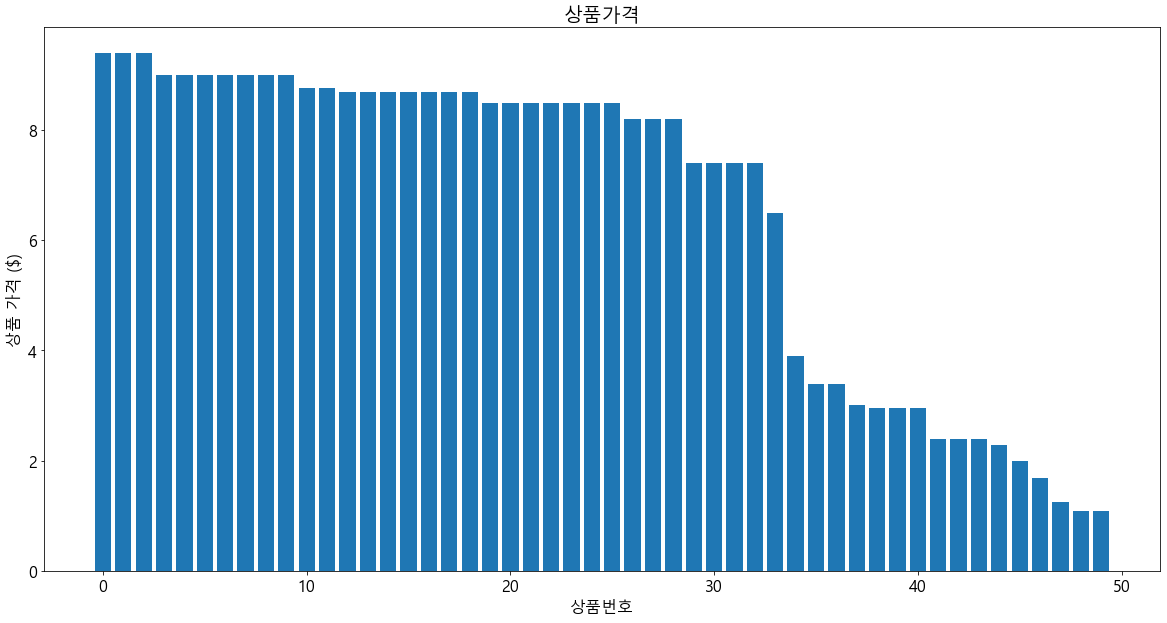

In [139]:
# 시각화

a1.sort_values(inplace=True, ascending=False)
# 상품의 이름의 수만큼 들어있는 리스트 생성
x_pos = np.arange(len(a1))

# 가격을 y좌표
y_pos = a1.values

plt.bar(x_pos, y_pos, align="center")
plt.xlabel("상품번호")
plt.ylabel("상품 가격 ($)")
plt.title("상품가격")
plt.show()

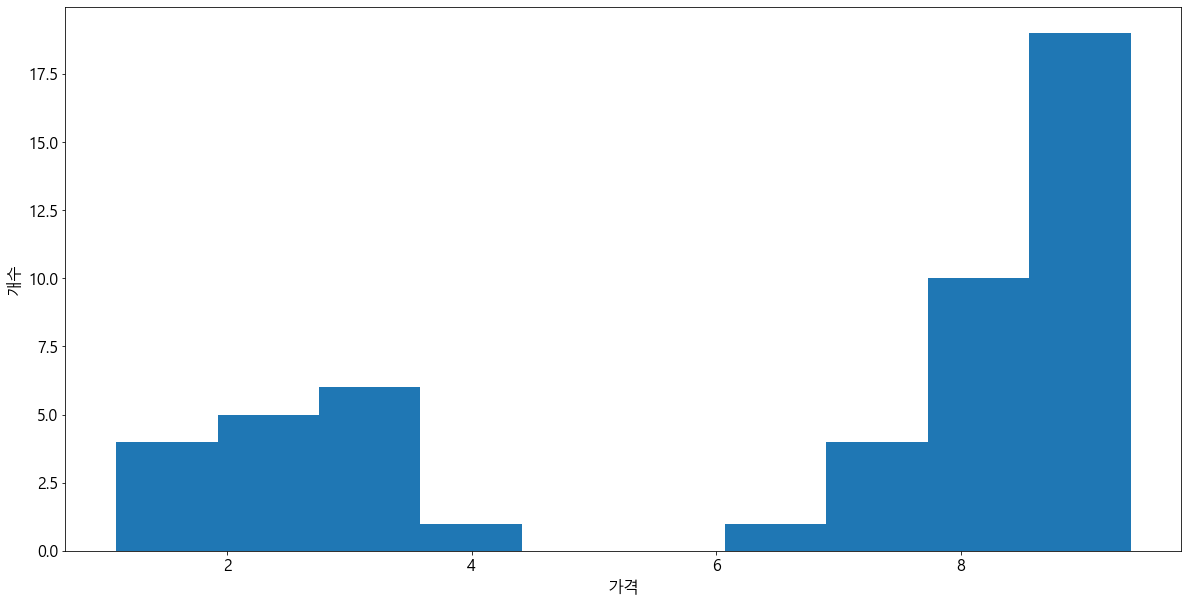

In [140]:
# 상품 가격 히스토그램
plt.hist(a1)
plt.ylabel("개수")
plt.xlabel("가격")
plt.show()

데이터 전처리를 할 때는 모든 가능성을 다 열어놓고 작업해야한다.

### 가장 비싼 주문에서 item이 몇개 팔렸는지

In [142]:
# order_id, quantity, item_price
a1 = chipo[["order_id", "quantity", "item_price"]]
a1

,order_id,quantity,item_price
0,1,1,2.39
1,1,1,3.39
2,1,1,3.39
3,1,1,2.39
4,2,2,16.98
...,...,...,...
4617,1833,1,11.75
4618,1833,1,11.75
4619,1834,1,11.25
4620,1834,1,8.75


In [143]:
# order_id를 기준으로 총 합을 구한다.
a2 = a1.groupby("order_id").sum()
a2

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


In [144]:
# item_price를 기준으로 정렬한다.
a3 = a2.sort_values(by="item_price", ascending=False)
a3

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30
...,...,...
17,2,10.08
889,2,10.08
1014,2,10.08


In [145]:
# order_id도 데이터로 하기 위해 인덱스를 재설정
a3.reset_index(inplace=True)
a3

,order_id,quantity,item_price
0,926,23,205.25
1,1443,35,160.74
2,1483,14,139.00
3,691,11,118.25
4,1786,20,114.30
...,...,...,...
1829,17,2,10.08
1830,889,2,10.08
1831,1014,2,10.08
1832,1303,2,10.08


In [146]:
print(f"주문번호 : {a3.loc[0, 'order_id']}")
print(f"주문수량 : {a3.loc[0, 'quantity']}")
print(f"주문 금액 : {a3.loc[0, 'item_price']}")

주문번호 : 926
주문수량 : 23
주문 금액 : 205.25


### Veggie Salad Bowl이 몇번 주문되었는지...


In [147]:
# Vaggie Salad Bowl 의 주문 내역을 가져온다.
chipo_salad = chipo.query('item_name == "Veggie Salad Bowl"')
chipo_salad


,order_id,quantity,item_name,choice_description,item_price,item_price2
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25,11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25,11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75
1316,536,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75,8.75
1884,760,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25,11.25
2156,869,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25,11.25
2223,896,1,Veggie Salad Bowl,"[Roasted Chili Corn Salsa, Fajita Vegetables]",8.75,8.75
2269,913,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.75,8.75


In [148]:
# 주문 횟수를 가져온다.
# (행, 열)
print(f"총 주문횟수 : {chipo_salad.shape[0]}")

총 주문횟수 : 18


### Chicken Bowl을 2개 이상 주문한 주문 횟수를 구한다.

In [156]:
# Chicken Bowl을 2개 이상 주문한 주문 목록을 가져온다.
a1 = chipo.query("item_name == 'Chicken Bowl' and quantity >=2")
a1.shape[0]

33